## Customer Service Requests Analysis

#### Background of Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

#### Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

#### Domain: 
    
    Customer Service

#### Analysis Tasks to be performed:

(Perform a service request data analysis of New York City 311 calls) 

1. Import a 311 NYC service request.

2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

5. Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

 - Whether the average response time across complaint types is similar or not (overall)
 - Are the type of complaint or service requested and location related?

#### 1. Import a 311 NYC service request.

#### Reading, Understanding and Optimizing data

As a part of data wrangling, first, we need to read and understand the data (features/columns) very clearly. Once we understand the data properly, we can plan for subsequent steps. The data need to be simplified (reduction/simplification) for further analysis. With the simplified data (which can be analyzed in an easy way), we can predict (inferences) some insight that can be used for future purposes.  

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [3]:
#Import data
data=pd.read_csv("D:\Data Science\Data Science with Python\Project\Data Science with Python Two/311_Service_Requests_from_2010_to_Present.csv",low_memory=False)

In [4]:
# Looking for features (columns)

data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
# Checking the data types and entries (if Nan)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
# Setting the option to view all columns of the dataset and view the data for any 4 random entries

pd.set_option('display.max_columns',None)
data.sample(4)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
208274,30913897,06/23/2015 12:52:43 PM,06/23/2015 04:12:08 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10025.0,801 AMSTERDAM AVENUE,AMSTERDAM AVENUE,WEST 99 STREET,WEST 100 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,06/23/2015 08:52:43 PM,The Police Department responded to the complai...,06/23/2015 04:12:08 PM,07 MANHATTAN,MANHATTAN,992892.0,229355.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.796198,-73.968788,"(40.796198304413394, -73.96878800335192)"
151156,31297692,08-12-15 21:59,08/13/2015 07:16:53 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10453.0,1743 MONTGOMERY AVENUE,MONTGOMERY AVENUE,WEST 176 STREET,POPHAM AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/13/2015 05:59:55 AM,The Police Department responded to the complai...,08/13/2015 07:16:54 AM,05 BRONX,BRONX,1006893.0,249228.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.850719,-73.918154,"(40.850719245087525, -73.91815405976621)"
62907,31876899,10/30/2015 03:58:21 PM,10/30/2015 06:36:48 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11223.0,1766 WEST 11 STREET,WEST 11 STREET,QUENTIN ROAD,HIGHLAWN AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/30/2015 11:58:21 PM,The Police Department responded and upon arriv...,10/30/2015 06:36:48 PM,11 BROOKLYN,BROOKLYN,988771.0,159288.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.603884,-73.983719,"(40.60388392580299, -73.98371870327311)"
211597,30898889,06/20/2015 10:12:16 PM,06/20/2015 11:16:39 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11238.0,425 CLERMONT AVENUE,CLERMONT AVENUE,GREENE AVENUE,FULTON STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,06/21/2015 06:12:16 AM,Your request can not be processed at this time...,06/20/2015 11:16:39 PM,02 BROOKLYN,BROOKLYN,992790.0,188823.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.684948,-73.969208,"(40.68494816596966, -73.96920785124631)"


Now, we need to understand each feature one by one. If the feature contains all Nun or all same entries or maybe, all different entries, then we will omit such columns, since these columns do not contain information that is statistically meaningful or can give us any trend.

For instance, the 'Unique Key' column has a different number for each entry whereas columns like 'Agency Name', 'Complaint Type' have a different group of lists from which we can predict which kind of complaint occurs more often (e.g frequency distribution). So we can improve our future prediction and even can take some precautions (if permissible).

In [7]:
# Dropping columns and saving it in another data frame

data_mod = data.drop(columns=['Unique Key'],axis=1)

In [8]:
# Looking the column information in new data frame

data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
  

In [9]:
# To evaluate distinguishable outcomes belong to this feature

pd.unique(data['Agency'])

array(['NYPD'], dtype=object)

In [10]:
# Frequency of the different outcomes

data['Agency'].value_counts()

NYPD    300698
Name: Agency, dtype: int64

In [11]:
data_mod = data_mod.drop(columns=['Agency'],axis=1)

In [12]:
pd.unique(data['Agency Name'])

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [13]:
data['Agency Name'].value_counts()

New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: Agency Name, dtype: int64

In [14]:
data['Complaint Type'].value_counts().head(5)

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [15]:
data.Descriptor.value_counts().head(5)

Loud Music/Party                 61430
No Access                        56976
Posted Parking Sign Violation    22440
Loud Talking                     21584
Partial Access                   20068
Name: Descriptor, dtype: int64

In [16]:
data['Location Type'].value_counts().head(4)

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Name: Location Type, dtype: int64

In [17]:
data['Incident Zip'].value_counts().head(4)

11385.0    5167
11368.0    4298
11211.0    4225
11234.0    4150
Name: Incident Zip, dtype: int64

In [18]:
data['Incident Address'].value_counts().head(4)

1207 BEACH AVENUE          904
78-15 PARSONS BOULEVARD    505
89 MOORE STREET            480
177 LAREDO AVENUE          311
Name: Incident Address, dtype: int64

In [19]:
data['Street Name'].value_counts().head(5)

BROADWAY          3237
3 AVENUE          1241
SHERMAN AVENUE    1156
BEACH AVENUE      1109
BEDFORD AVENUE     979
Name: Street Name, dtype: int64

In [20]:
data['Cross Street 1'].value_counts().head(4)

BROADWAY    4338
BEND        4129
3 AVENUE    3112
5 AVENUE    3035
Name: Cross Street 1, dtype: int64

In [21]:
data['Cross Street 2'].value_counts().head(4)

BEND        4391
BROADWAY    3784
8 AVENUE    2766
DEAD END    2144
Name: Cross Street 2, dtype: int64

In [22]:
data['Intersection Street 1'].value_counts().head(4)

BROADWAY      672
170 STREET    441
44 STREET     355
6 AVENUE      348
Name: Intersection Street 1, dtype: int64

In [23]:
data['Intersection Street 2'].value_counts().head(4)

BROADWAY    1358
6 AVENUE     715
2 AVENUE     617
5 AVENUE     551
Name: Intersection Street 2, dtype: int64

In [24]:
data['Address Type'].value_counts().head(4)

ADDRESS         238644
INTERSECTION     43366
BLOCKFACE        12014
LATLONG           3509
Name: Address Type, dtype: int64

In [25]:
data['City'].value_counts().head(4)

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
Name: City, dtype: int64

In [26]:
data.Landmark.value_counts().head(5)

CENTRAL PARK              67
PROSPECT PARK             22
WASHINGTON SQUARE PARK    16
SUNSET PARK               13
UNION SQUARE PARK         13
Name: Landmark, dtype: int64

In [27]:
data['Facility Type'].value_counts()

Precinct    298527
Name: Facility Type, dtype: int64

In [28]:
data.Status.value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

In [29]:
data['Due Date'].value_counts().head(4)

11-07-15 7:34    9
06-07-15 6:23    9
07-12-15 7:04    9
11-02-15 6:12    8
Name: Due Date, dtype: int64

In [30]:
data['Resolution Description'].value_counts().head(4)

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.    90490
The Police Department responded to the complaint and took action to fix the condition.                                                     61624
The Police Department responded and upon arrival those responsible for the condition were gone.                                            58031
The Police Department responded to the complaint and determined that police action was not necessary.                                      38211
Name: Resolution Description, dtype: int64

In [31]:
data['School Name'].value_counts()

Unspecified                        300697
Alley Pond Park - Nature Center         1
Name: School Name, dtype: int64

In [32]:
data['School Number'].value_counts()

Unspecified    300697
Q001                1
Name: School Number, dtype: int64

In [33]:
data['School Region'].value_counts()

Unspecified    300697
Name: School Region, dtype: int64

In [34]:
data['School Not Found'].value_counts()

N    300698
Name: School Not Found, dtype: int64

In [35]:
data['School Code'].value_counts()

Unspecified    300697
Name: School Code, dtype: int64

In [36]:
data['School Phone Number'].value_counts()

Unspecified    300697
7182176034          1
Name: School Phone Number, dtype: int64

In [37]:
data['School Address'].value_counts()

Unspecified                                     300697
Grand Central Parkway, near the soccer field         1
Name: School Address, dtype: int64

In [38]:
data['School City'].value_counts()

Unspecified    300697
QUEENS              1
Name: School City, dtype: int64

In [39]:
data['School State'].value_counts()

Unspecified    300697
NY                  1
Name: School State, dtype: int64

In [40]:
data['School Zip'].value_counts()

Unspecified    300697
Name: School Zip, dtype: int64

In [41]:
data['School Not Found'].value_counts()

N    300698
Name: School Not Found, dtype: int64

In [42]:
data['School or Citywide Complaint'].value_counts()

Series([], Name: School or Citywide Complaint, dtype: int64)

In [43]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [44]:
data_mod = data_mod.drop(columns=['School Name', 'School Number', 'School Region', 'School Code',
                              'School Phone Number', 'School Address', 'School City', 'School State',
                                 'School Zip', 'School Not Found', 'School or Citywide Complaint'],axis=1)

In [45]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [46]:
data['Vehicle Type'].value_counts()

Series([], Name: Vehicle Type, dtype: int64)

In [47]:
data['Taxi Company Borough'].value_counts()

Series([], Name: Taxi Company Borough, dtype: int64)

In [48]:
data['Taxi Pick Up Location'].value_counts()

Series([], Name: Taxi Pick Up Location, dtype: int64)

In [49]:
data_mod = data_mod.drop(columns=['Vehicle Type','Taxi Company Borough','Taxi Pick Up Location'],axis=1)

In [50]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [51]:
data['Bridge Highway Name'].value_counts().head(5)

FDR Dr                 33
Belt Pkwy              30
BQE/Gowanus Expwy      27
Staten Island Expwy    21
Cross Bronx Expwy      19
Name: Bridge Highway Name, dtype: int64

In [52]:
data['Bridge Highway Direction'].value_counts().head(4)

East/Queens Bound           21
Northbound/Uptown           20
North/Bronx Bound           20
West/Staten Island Bound    18
Name: Bridge Highway Direction, dtype: int64

In [53]:
data['Road Ramp'].value_counts()

Roadway    162
Ramp        51
Name: Road Ramp, dtype: int64

In [54]:
data['Bridge Highway Segment'].value_counts().head(6)

East 96th St (Exit 14) - Triborough Br (Exit 17)                              6
Bronx River Pkwy (Exit 4B) - Westchester Ave / White Plains Road (Exit 5A)    5
Westchester Ave / White Plains Road (Exit 5A) - Castle Hill Ave (Exit 5B)     3
Richmond Ave (Exit 7) - Victory Blvd (Exit 8)                                 3
BEGIN Staten Island Expwy (Exit 15N) - Lily Pond Ave/Bay St (Exit 15S)        3
East 177th St/Sheridan Expwy (I-895) (Exit 5)                                 3
Name: Bridge Highway Segment, dtype: int64

In [55]:
data['Garage Lot Name'].value_counts()

Series([], Name: Garage Lot Name, dtype: int64)

In [56]:
data['Ferry Direction'].value_counts()

Manhattan Bound    1
Name: Ferry Direction, dtype: int64

In [57]:
data['Ferry Terminal Name'].value_counts()

St. George Terminal (Staten Island)    1
Barberi                                1
Name: Ferry Terminal Name, dtype: int64

In [58]:
data_mod = data_mod.drop(columns=['Garage Lot Name','Ferry Direction','Ferry Terminal Name'],axis=1)

In [59]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [60]:
data['Latitude'].value_counts().head(5)

40.830362    902
40.721959    505
40.703819    480
40.647132    362
40.708726    341
Name: Latitude, dtype: int64

In [61]:
data['Longitude'].value_counts().head(5)

-73.866022    902
-73.809697    505
-73.942073    480
-73.790654    341
-74.004623    340
Name: Longitude, dtype: int64

In [62]:
data['Location'].value_counts().head(4)

(40.83036235589997, -73.86602154214397)     902
(40.72195913199264, -73.80969682426189)     505
(40.703818970933284, -73.94207345177706)    476
(40.708726489323325, -73.7906539235748)     341
Name: Location, dtype: int64

In [63]:
data_mod.sample(10)

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
172085,07/24/2015 11:59:15 PM,07/25/2015 12:40:08 AM,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10040.0,10 SICKLES STREET,SICKLES STREET,NAGLE AVENUE,SHERMAN AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,07/25/2015 07:59:15 AM,The Police Department responded to the complai...,07/25/2015 12:40:08 AM,12 MANHATTAN,MANHATTAN,1004278.0,252986.0,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,40.861040,-73.927595,"(40.86104014796555, -73.92759507010399)"
204705,06/26/2015 04:32:08 PM,06/26/2015 11:49:26 PM,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,10308.0,95 MANSION AVENUE,MANSION AVENUE,YACHT CLUB COVE,GREAT KILLS ROAD,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,06/27/2015 12:32:08 AM,The Police Department responded to the complai...,06/26/2015 11:49:26 PM,03 STATEN ISLAND,STATEN ISLAND,945515.0,138027.0,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,40.545443,-74.139373,"(40.54544322439576, -74.13937287019317)"
207927,06/23/2015 09:16:44 PM,06/23/2015 10:47:44 PM,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,10457.0,2140 CLINTON AVENUE,CLINTON AVENUE,EAST 181 STREET,EAST 182 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,06/24/2015 05:16:44 AM,The Police Department responded to the complai...,06/23/2015 10:47:44 PM,06 BRONX,BRONX,1015598.0,248572.0,Unspecified,BRONX,NaN,NaN,NaN,NaN,40.848892,-73.886692,"(40.848892105511645, -73.88669185177898)"
80602,10/13/2015 10:35:36 PM,10/13/2015 11:52:14 PM,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11421.0,NaN,NaN,NaN,NaN,ATLANTIC AVENUE,75 STREET,INTERSECTION,WOODHAVEN,NaN,Precinct,Closed,10/14/2015 06:35:36 AM,The Police Department responded to the complai...,10/13/2015 11:52:14 PM,09 QUEENS,QUEENS,1021888.0,188417.0,Unspecified,QUEENS,NaN,NaN,NaN,NaN,40.683758,-73.864293,"(40.6837578857499, -73.86429336677995)"
73077,10/21/2015 12:42:44 AM,10/21/2015 07:01:23 AM,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10026.0,125 WEST 112 STREET,WEST 112 STREET,ST NICHOLAS AVENUE,7 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/21/2015 08:42:44 AM,The Police Department responded to the complai...,10/21/2015 06:48:51 AM,10 MANHATTAN,MANHATTAN,997302.0,230750.0,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,40.800022,-73.952858,"(40.800021785765296, -73.95285785808254)"
87370,10-07-15 20:06,10-07-15 21:51,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11230.0,224 ELMWOOD AVENUE,ELMWOOD AVENUE,EAST 2 STREET,EAST 3 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10-08-15 4:06,The Police Department issued a summons in resp...,10-07-15 21:51,12 BROOKLYN,BROOKLYN,991196.0,167766.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,40.627153,-73.974977,"(40.627152711692524, -73.9749769263818)"
127827,09-02-15 15:06,09-02-15 22:39,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11106.0,34-55 9 STREET,9 STREET,34 AVENUE,35 AVENUE,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,09-02-15 23:06,The Police Department responded and upon arriv...,09-02-15 22:39,01 QUEENS,QUEENS,1000839.0,217657.0,Unspecified,QUEENS,NaN,NaN,NaN,NaN,40.764079,-73.940115,"(40.764079051723655, -73.94011500297428)"
167025,07/29/2015 09:26:44 AM,07/29/2015 04:22:45 PM,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11416.0,101-50

In [64]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [65]:
# Final info.(features) after cleaning  ------------------

data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    300698 non-null  object 
 1   Closed Date                     298534 non-null  object 
 2   Agency Name                     300698 non-null  object 
 3   Complaint Type                  300698 non-null  object 
 4   Descriptor                      294784 non-null  object 
 5   Location Type                   300567 non-null  object 
 6   Incident Zip                    298083 non-null  float64
 7   Incident Address                256288 non-null  object 
 8   Street Name                     256288 non-null  object 
 9   Cross Street 1                  251419 non-null  object 
 10  Cross Street 2                  250919 non-null  object 
 11  Intersection Street 1           43858 non-null   object 
 12  Intersection Str

#### 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

Now, converting the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [66]:
data_mod['Closed Date'] = pd.to_datetime(data_mod['Closed Date'])
data_mod['Created Date'] = pd.to_datetime(data_mod['Created Date'])

data_mod['Request_Closing_Time'] = data_mod['Closed Date'] - data_mod['Created Date']

#data_mod = data_mod[(data_mod.Request_Closing_Time)>=0]

In [67]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Created Date                    300698 non-null  datetime64[ns] 
 1   Closed Date                     298534 non-null  datetime64[ns] 
 2   Agency Name                     300698 non-null  object         
 3   Complaint Type                  300698 non-null  object         
 4   Descriptor                      294784 non-null  object         
 5   Location Type                   300567 non-null  object         
 6   Incident Zip                    298083 non-null  float64        
 7   Incident Address                256288 non-null  object         
 8   Street Name                     256288 non-null  object         
 9   Cross Street 1                  251419 non-null  object         
 10  Cross Street 2                  250919 non-n

In [68]:
data_mod.sample(4)

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Request_Closing_Time
133570,2015-08-28 19:07:57,2015-08-29 03:27:00,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,10033.0,350 AUDOBON AVENUE,AUDOBON AVENUE,WEST 182 STREET,WEST 183 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/29/2015 03:07:57 AM,The Police Department responded and upon arriv...,08/29/2015 03:27:00 AM,12 MANHATTAN,MANHATTAN,1003156.0,248844.0,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,40.849674,-73.931663,"(40.84967407175435, -73.93166298794667)",0 days 08:19:03
298342,2015-03-31 21:45:24,2015-03-31 23:44:49,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10305.0,NaN,NaN,NaN,NaN,ST JOHN'S AVENUE,SCHUBERT STREET,INTERSECTION,STATEN ISLAND,NaN,Precinct,Closed,04-01-15 5:45,The Police Department issued a summons in resp...,03/31/2015 11:44:49 PM,01 STATEN ISLAND,STATEN ISLAND,964092.0,160893.0,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,40.608268,-74.072599,"(40.608267548090666, -74.07259897486128)",0 days 01:59:25
264539,2015-05-06 17:28:00,2015-05-07 03:18:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11208.0,554 AUTUMN AVENUE,AUTUMN AVENUE,PITKIN AVENUE,BELMONT AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,05-07-15 1:28,The Police Department reviewed your complaint ...,05-07-15 3:18,05 BROOKLYN,BROOKLYN,1020841.0,185342.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,40.675322,-73.868085,"(40.67532210741569, -73.86808509445277)",0 days 09:50:00
149870,2015-08-14 00:23:08,2015-08-14 07:32:04,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11433.0,92-06 173 STREET,173 STREET,JAMAICA AVENUE,93 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Closed,08/14/2015 08:23:08 AM,The Police Department responded to the complai...,08/14/2015 07:32:04 AM,12 QUEENS,QUEENS,1043415.0,197121.0,Unspecified,QUEENS,NaN,NaN,NaN,NaN,40.707531,-73.786600,"(40.70753055918456, -73.78659995072763)",0 days 07:08:56


In [69]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

#### 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining

Now, lets visualize some basic results that we can conclude from the data. For instance, which type of complaint is more dominant?

First, we will attempt the visualization of a single feature (complain type). Then, we will do the same for other features. 

In [70]:
# Measuring the frequency (occurence) of the different complaint---------------------------

data_complaint = data['Complaint Type'].value_counts()
data_complaint = data_complaint.to_frame()
data_complaint = data_complaint.rename(columns={'Complaint Type':'Counts'})
data_complaint

,Counts
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416
Noise - Park,4042


In [71]:
# Evaluate the above in percentage ----------------------------

data_complaint['Percentage'] = np.around((data_complaint.Counts/data_complaint.Counts.sum())*100,decimals=2)
data_complaint

,Counts,Percentage
Blocked Driveway,77044,25.62
Illegal Parking,75361,25.06
Noise - Street/Sidewalk,48612,16.17
Noise - Commercial,35577,11.83
Derelict Vehicle,17718,5.89
Noise - Vehicle,17083,5.68
Animal Abuse,7778,2.59
Traffic,4498,1.50
Homeless Encampment,4416,1.47
Noise - Park,4042,1.34


In [72]:
# Keeping the major complaint types ---------------

data_complaint = data_complaint[data_complaint.Percentage>1.0]
data_complaint = data_complaint.reset_index()
data_complaint = data_complaint.rename(columns={'index':'Complaint Type'})
data_complaint

,Complaint Type,Counts,Percentage
0,Blocked Driveway,77044,25.62
1,Illegal Parking,75361,25.06
2,Noise - Street/Sidewalk,48612,16.17
3,Noise - Commercial,35577,11.83
4,Derelict Vehicle,17718,5.89
5,Noise - Vehicle,17083,5.68
6,Animal Abuse,7778,2.59
7,Traffic,4498,1.50
8,Homeless Encampment,4416,1.47
9,Noise - Park,4042,1.34


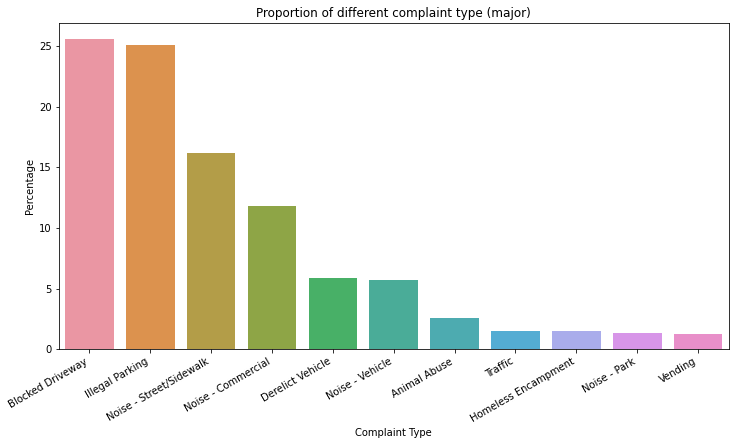

<Figure size 432x288 with 0 Axes>

In [73]:
# Visualization of the above evaluated dataset ---------------------

plt.figure(figsize=(12,6))
com_type = sns.barplot(x=data_complaint['Complaint Type'],y=data_complaint.Percentage,data=data_complaint)
com_type.set_xticklabels(com_type.get_xticklabels(), rotation=30, ha="right")
plt.title('Proportion of different complaint type (major)')
plt.show()
plt.tight_layout()

From the above data (Counts and Percentage), it is clear that main complain comes from 'Blocked Driveway', 'Illegal Parking' and noise from Street/Sidewalk or Commercial. 

However, it is alluring to represent such results via visualization. And it is easy to realise the facts also. 

Now, we will do the same for several features.

In [74]:
# Applying the above procedure for Descriptor-------------------

data_descriptor = np.around(((data_mod['Descriptor'].value_counts()*100) / data_mod['Descriptor'].value_counts().sum()),
                            decimals=2)
data_descriptor = data_descriptor.to_frame()
data_descriptor = data_descriptor.rename(columns={'Descriptor':'Percentage'})
data_descriptor['Descriptor'] = data_descriptor.index
cols = data_descriptor.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_descriptor = data_descriptor[cols]
data_descriptor = data_descriptor[(data_descriptor.Percentage) >= 2.0]
data_descriptor = data_descriptor.reset_index()
data_descriptor = data_descriptor.drop(columns=['index'],axis=1)
data_descriptor

,Descriptor,Percentage
0,Loud Music/Party,20.84
1,No Access,19.33
2,Posted Parking Sign Violation,7.61
3,Loud Talking,7.32
4,Partial Access,6.81
5,With License Plate,6.01
6,Blocked Hydrant,5.46
7,Commercial Overnight Parking,4.13
8,Car/Truck Music,3.82
9,Blocked Sidewalk,3.77


In [75]:
# Applying the above procedure for Location Type-------------------

data_location_type = np.around(((data_mod['Location Type'].value_counts()*100) / data_mod['Location Type'].value_counts().sum()),
                            decimals=2)
data_location_type = data_location_type.to_frame()
data_location_type = data_location_type.rename(columns={'Location Type':'Percentage'})
data_location_type['Location Type'] = data_location_type.index
cols = data_location_type.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_location_type = data_location_type[cols]
data_location_type = data_location_type[(data_location_type.Percentage) >= 0.1]
data_location_type = data_location_type.reset_index()
data_location_type = data_location_type.drop(columns=['index'],axis=1)
data_location_type

,Location Type,Percentage
0,Street/Sidewalk,82.94
1,Store/Commercial,6.78
2,Club/Bar/Restaurant,5.78
3,Residential Building/House,2.32
4,Park/Playground,1.59
5,House of Worship,0.31


In [76]:
# Applying the above procedure for City-------------------

data_city = np.around(((data_mod['City'].value_counts()*100) / data_mod['City'].value_counts().sum()),
                            decimals=2)
data_city = data_city.to_frame()
data_city = data_city.rename(columns={'City':'Percentage'})
data_city['City'] = data_city.index
cols = data_city.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_city = data_city[cols]
data_city = data_city[(data_city.Percentage) >= 1.0]
data_city = data_city.reset_index()
data_city = data_city.drop(columns=['index'],axis=1)
data_city

,City,Percentage
0,BROOKLYN,32.98
1,NEW YORK,22.14
2,BRONX,13.65
3,STATEN ISLAND,4.14
4,JAMAICA,2.45
5,ASTORIA,2.12
6,FLUSHING,2.00
7,RIDGEWOOD,1.73
8,CORONA,1.44
9,WOODSIDE,1.19


In [77]:
# Applying the above procedure for Address Type-------------------

data_address_type = np.around(((data_mod['Address Type'].value_counts()*100) / data_mod['Address Type'].value_counts().sum()),
                            decimals=2)
data_address_type = data_address_type.to_frame()
data_address_type = data_address_type.rename(columns={'Address Type':'Percentage'})
data_address_type['Address Type'] = data_address_type.index
cols = data_address_type.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_address_type = data_address_type[cols]
#data_address_type = data_address_type[(data_address_type.Percentage) >= 1.0]
data_address_type = data_address_type.reset_index()
data_address_type = data_address_type.drop(columns=['index'],axis=1)
data_address_type

,Address Type,Percentage
0,ADDRESS,80.11
1,INTERSECTION,14.56
2,BLOCKFACE,4.03
3,LATLONG,1.18
4,PLACENAME,0.12


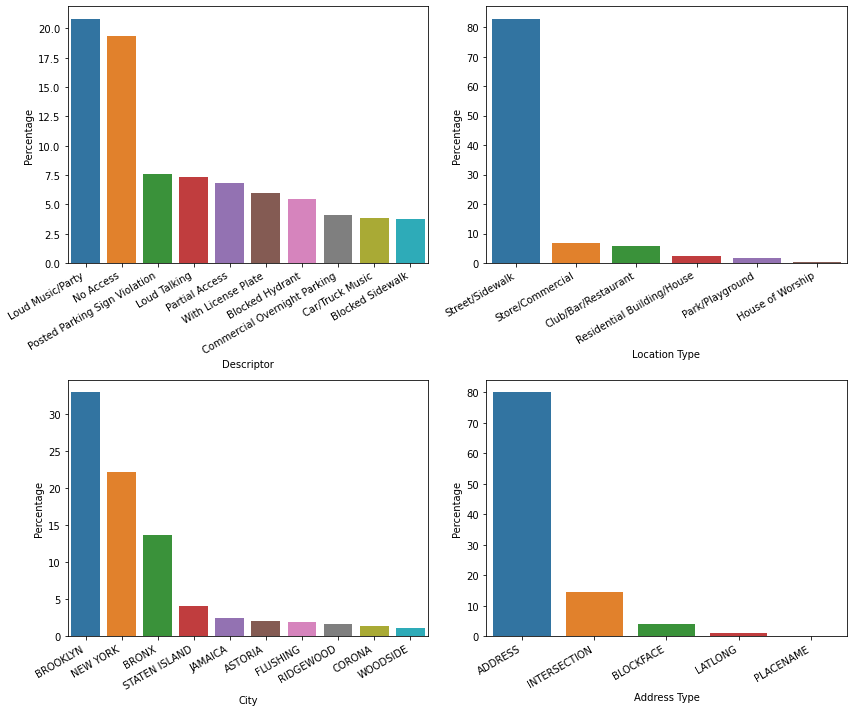

In [78]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#sns.set_theme(style="whitegrid")
#plt.suptitle("Proportion of different outcomes for few interesting features.")

descriptor = sns.barplot(ax=ax[0,0],x=data_descriptor.Descriptor,y=data_descriptor.Percentage,)
descriptor.set_xticklabels(descriptor.get_xticklabels(), rotation=30, ha="right")

location_type = sns.barplot(ax=ax[0,1],x=data_location_type['Location Type'],y=data_location_type.Percentage,)
location_type.set_xticklabels(location_type.get_xticklabels(), rotation=30, ha="right")

city = sns.barplot(ax=ax[1,0],x=data_city['City'],y=data_city.Percentage,)
city.set_xticklabels(city.get_xticklabels(), rotation=30, ha="right")

address = sns.barplot(ax=ax[1,1],x=data_address_type['Address Type'],y=data_address_type.Percentage,)
address.set_xticklabels(address.get_xticklabels(), rotation=30, ha="right")


#plt.subplots_adjust(left=None, bottom=None, right=None, top=0.0, wspace=None, hspace=None)
plt.tight_layout()

So it is obvious that the Loud Music/party causes the biggest problem for the citizens. And it seems most complaints occur at Street/Sidewalk. And 'Brooklyn' faces the largest problems among all other cities. However, we have mostly solid information.  The place where the problem occurs is pinpointed (Proper Address).

These observations are very preliminary. One can expect or guess the outcomes from these visualizations, regarding the corresponding features. However, it needs to be realized that we can not infer/predict from here without any proper statistical explanation.

Now, let's convert the time data ('timedelta64') into integer and store them (converting into hours) in a new column. Besides that let us cut the ambiguous data.

In [79]:
data_place_CType_RCTime = data_mod[['City','Complaint Type','Request_Closing_Time']]
data_place_CType_RCTime.dropna(subset = ['City','Complaint Type','Request_Closing_Time'], inplace = True)
data_place_CType_RCTime['DeltaT(in_hr.)'] = np.around( (data_place_CType_RCTime['Request_Closing_Time'].astype(np.int64)/
                                                      (pow(10,9)*3600) ), decimals=2)
neg_time = data_place_CType_RCTime[data_place_CType_RCTime['DeltaT(in_hr.)'] < 0].sum()
print('The no negative time difference (Created Time > Clossing Time, which is not possible) = \n',neg_time)
#data_place_CType_RCTime['DeltaT(in sec)/Avg.'] = np.around((data_place_CType_RCTime['DeltaT(in sec)']/Avarage_time),decimals=1)
data_place_CType_RCTime.head(6)

E:\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Admin\AppData\Local\Temp/ipykernel_1308/736232276.py:3: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data_place_CType_RCTime['DeltaT(in_hr.)'] = np.around( (data_place_CType_RCTime['Request_Closing_Time'].astype(np.int64)/
C:\Users\Admin\AppData\Local\Temp/ipykernel_1308/736232276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

TypeError: float() argument must be a string or a number, not 'Timedelta'

Let us calculate some statistical parameters, in order to draw a conclusion on the solution time taken so that we can group them into different categories depending on the time interval.

In [ ]:
Avarage_time = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].mean()),decimals=2)
print('Avarage time gap between logging the complaint and problem solved = ',Avarage_time, 'hour')
Central_val = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].median()),decimals=2)
print('Central value of the distribution = ',Central_val, 'hour')
Most_occoor = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].mode()),decimals=2)
print('Most occered value = ',Most_occoor, 'hour')
stand_dev = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].std()),decimals=2)
print('Deviation is = ',stand_dev)

So, one can take the central value as the normal time taken to solve the problem/issue. However, as it is clear from the deviation that it spreads around 6 hr.(more than the central value) from the distribution, so it is more practical to choose average time as the normal time to solve the problem. And categorize time interval as per the codes written below. 

In [ ]:
conditions = [data_place_CType_RCTime['DeltaT(in_hr.)'] <= 0.5, 
             (0.50 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 1.00),
             (1.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 2.00),
             (2.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 6.00),
             (6.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 10.00),
             (10.00 < data_place_CType_RCTime['DeltaT(in_hr.)'])]

choices = ['Super fast','Very fast','Fast','Normal','Slow','Super Slow']

data_place_CType_RCTime['Solution Status'] = np.select(conditions,choices)

In [ ]:
data_place_CType_RCTime.head(6)

In [ ]:
data_place_CType_RCTime['Solution Status'].value_counts()

In [ ]:
data_place_CType_RCTime['Solution Status'].value_counts().plot(kind='bar')
plt.xlabel('Time Status')
plt.ylabel('Counts')
plt.title('Proportion of the fastness of different Solution status')
plt.show()
plt.tight_layout()

Based on the above-discussed approximation, the proportion of the time interval (expressed in different groups/status) to solve the problem, is depicted here. And it is obvious that the 'Normal' status will dominant since the range is chosen around the average value.

Now, let's see, is there any pattern for lodging a complaint?

Does it depend on a particular day or is there any month where too much or fewer problems are recorded?

In [ ]:
data_mod['Created Date'].head(5)

In [ ]:
# Creating a data frame Contain Days and Months of Complaint date -----------------------------

Year_Month_Day = pd.to_datetime(data_mod['Created Date'].dt.date)
Month_Day = pd.DataFrame()
Month_Day['Date'] = pd.to_datetime(Year_Month_Day.dt.date)
Month_Day['Month'] = Year_Month_Day.dt.month
Month_Day['Day'] = Year_Month_Day.dt.day
Month_Day['Month Name'] = Month_Day['Month'].apply(lambda x: calendar.month_abbr[x])
Month_Day['Day No'] = Month_Day['Date'].dt.weekday
Month_Day['Day Name'] = Month_Day['Day No'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',
                                                 5:'Saturday',6:'Sunday'})
Month_Day.sample(20)

In [ ]:
Month_plot = Month_Day['Month Name'].value_counts()
Month_plot = Month_plot.to_frame()
Month_plot = Month_plot.rename(columns={'Month Name':'Counts'})
Month_plot

In [ ]:
Day_plot = Month_Day['Day Name'].value_counts()
Day_plot = Day_plot.to_frame()
Day_plot = Day_plot.rename(columns={'Day Name':'Counts'})
Day_plot

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(14,8))

axes[0].pie(Month_plot['Counts'], labels = Month_plot.index,autopct='%1.1f%%')
axes[0].set_title('Complain logged in different months of the year')

axes[1].pie(Day_plot['Counts'], labels = Day_plot.index,autopct='%1.1f%%')
axes[1].set_title('Complain logged in different days of the year')

plt.tight_layout()

So there is nothing abrupt for the months of lodging complaint. However, a very small amount of complaints recorded in the month of March.

The same observation can be made for the days. But if we look carefully, there is a small increment on the weekends compared to the weekly days. 

However, looking at the days of a year might hide some extra information. It is better to check the days of each month of the year.

In [ ]:
Month_Day_grouped = Month_Day.groupby(['Month Name','Day Name'],as_index=False)['Day No'].count()
Month_Day_grouped_final = Month_Day_grouped.rename(columns={'Day No':'Counts'})
Month_Day_grouped_final.head(15)

In [ ]:
Month_Day[( (Month_Day['Month Name'] == 'Apr') & (Month_Day['Day Name'] == 'Monday') )].count()

This is just to check whether the grouping operation is done correctly or not.


As you can see below, complaints created in each month for all seven days of the week are plotted. As we already counter that in March there is an abrupt decrement of complaint lodging compared to the other months. And Only three days of a week contributed here. It may contain seven days of the week, but with a very lesser amount. So let's check that to as well from the numbers.

In [ ]:
plt.figure(figsize=(20,8))

month_day_plot = sns.barplot(x=Month_Day_grouped_final['Month Name'], y=Month_Day_grouped_final['Counts'], 
                             hue=Month_Day_grouped_final['Day Name'], data=Month_Day_grouped_final)
month_day_plot.set_xticklabels(month_day_plot.get_xticklabels(), rotation=30, ha="right")
plt.title('Distribution of daily complain in different months of the year')
plt.show()
plt.tight_layout()

In [ ]:
Month_Day_grouped[Month_Day_grouped['Month Name'] == 'Mar']

So complaints are recorded only in these three days of March.

And let's have a look quickly at the status of the complaints.

In [ ]:
data_mod['Status'].value_counts().plot(kind='barh')
plt.xlabel('Status')
plt.ylabel('Counts')
plt.title('Proportion of different Solution status')
plt.show()
plt.tight_layout()

#### 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

Ordering the complaint types based on the average ‘Request_Closing_Time’ (converted into integer and kept in column 'DeltaT(in_hr.)') and grouping them for different locations (such as 'City').

In [ ]:
Complaint_City_AvgTime_grouped = data_place_CType_RCTime.groupby(['City','Complaint Type']).agg({'DeltaT(in_hr.)':'mean'})
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.rename(
    columns={'DeltaT(in_hr.)':'Avg. Time(Given City, Complaint Type)'})
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.transform('Avg. Time(Given City, Complaint Type)')
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.to_frame()
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.sort_values(
    ['City','Avg. Time(Given City, Complaint Type)'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Complaint_City_AvgTime_grouped

#### 5. Perform a statistical test for the following:

(For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.)

 - Whether the average response time across complaint types is similar or not (overall)
 - Are the type of complaint or service requested and location related?

In [ ]:
import scipy.stats as stat

 - Whether the average response time across complaint types is similar or not (overall)

In [ ]:
# Average response time across complaint types --------------------

Complaint_AvgTime = data_place_CType_RCTime.groupby(['Complaint Type']).agg({'DeltaT(in_hr.)':'mean'})
Complaint_AvgTime = pd.DataFrame(Complaint_AvgTime)
Complaint_AvgTime = Complaint_AvgTime.sort_values(['DeltaT(in_hr.)']).reset_index()
Complaint_AvgTime

#### 1. T-test
#### (a) 1-sample T-test

It is noteworthy that the value of the Avg. time due to complaint type 'Animal in a Park' quite out of the range. Let's find out the average with or without this particular complaint type.

In [ ]:
Tmean_without = float(Complaint_AvgTime[Complaint_AvgTime['Complaint Type']!='Animal in a Park'].mean())
print("Without complaint type 'Animal in a Park' ----- ",Tmean_without)
Tmean_with = float(Complaint_AvgTime['DeltaT(in_hr.)'].mean())
print("With complaint type 'Animal in a Park' ----- ",Tmean_with)

#### With complaint type 'Animal in a Park'

In [ ]:
ttest_with, pval_with = stat.ttest_1samp(Complaint_AvgTime['DeltaT(in_hr.)'], Tmean_with)
print('T-statistic is =',ttest_with)
print('p value is =',np.around(pval_with))

In [ ]:
if (pval_with<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(pval_with,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(pval_with,decimals=2)))

#### Without complaint type 'Animal in a Park'

In [ ]:
Complaint_AvgTime_without = Complaint_AvgTime.drop([len(Complaint_AvgTime)-1],axis=0)
Complaint_AvgTime_without

In [ ]:
ttest_without, pval_without = stat.ttest_1samp(Complaint_AvgTime_without['DeltaT(in_hr.)'], Tmean_without)
print('T-statistic is =',ttest_without)
print('p value is =',np.around(pval_without,decimals=8))

In [ ]:
if (pval_without<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(pval_without,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(pval_without,decimals=2)))

With or without the Hypothesis remain the same.

#### (b) 2-sample T-test

In [ ]:
sample1 = Complaint_AvgTime.sample(frac=.5)
sample1

In [ ]:
sample2 = Complaint_AvgTime.drop(sample1.index)
sample2

In [ ]:
print('Mean of 1st sample =',np.around(float(sample1['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 1st sample =',np.around(float(sample1['DeltaT(in_hr.)'].std()),decimals=2))
print('Mean of 2nd sample =',np.around(float(sample2['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 2nd sample =',np.around(float(sample2['DeltaT(in_hr.)'].std()),decimals=2))

In [ ]:
ttest_2sp, p_val = stat.ttest_ind(sample1['DeltaT(in_hr.)'],sample2['DeltaT(in_hr.)'])
print('T-statistic is =',ttest_2sp)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
if (p_val<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(p_val,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(p_val,decimals=2)))

#### 2. One way F-test (ANOVA)

In [ ]:
sample1_anova = Complaint_AvgTime.sample(frac=1/3)
sample1_anova

In [ ]:
rest_data = Complaint_AvgTime.drop(sample1_anova.index)
rest_data

In [ ]:
sample2_anova = rest_data.sample(frac=1/2)
sample2_anova

In [ ]:
sample3_anova = rest_data.drop(sample2_anova.index)
sample3_anova

In [ ]:
print('Mean of 1st sample =',np.around(float(sample1_anova['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 1st sample =',np.around(float(sample1_anova['DeltaT(in_hr.)'].std()),decimals=2))
print('Mean of 2nd sample =',np.around(float(sample2_anova['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 2nd sample =',np.around(float(sample2_anova['DeltaT(in_hr.)'].std()),decimals=2))
print('Mean of 3rd sample =',np.around(float(sample3_anova['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 3rd sample =',np.around(float(sample3_anova['DeltaT(in_hr.)'].std()),decimals=2))

#### (a) Shapiro-Wilk normality test for each data group

In [ ]:
f_val,p_val = stat.shapiro(sample1_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
f_val,p_val = stat.shapiro(sample2_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
f_val,p_val = stat.shapiro(sample3_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

 - All p values are greater than 0.05
 - Fail to reject the null hypothesis
 - Samples come from populations that follow normal distribution

#### (b) Levene variance test  

In [ ]:
f_val,p_val = stat.levene(sample1_anova['DeltaT(in_hr.)'],sample2_anova['DeltaT(in_hr.)'],sample3_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

 - All p values are greater than 0.05
 - Fail to reject the null hypothesis
 - Samples have same varience

#### (c) One way ANOVA

In [ ]:
f_val,p_val = stat.f_oneway(sample1_anova['DeltaT(in_hr.)'],sample2_anova['DeltaT(in_hr.)'],sample3_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
if (p_val<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(p_val,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(p_val,decimals=2)))

#### (d) Again independent 2-sample T-test

We already checked the independent T-test for 2 samples. Let's do the same for 3 samples and check the consistency.

In [ ]:
t_val,p_val = stat.ttest_ind(sample1_anova['DeltaT(in_hr.)'],sample2_anova['DeltaT(in_hr.)'])
print('T-statistic for sample 1 and 2 is =',t_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
t_val,p_val = stat.ttest_ind(sample1_anova['DeltaT(in_hr.)'],sample3_anova['DeltaT(in_hr.)'])
print('T-statistic for sample 1 and 3 is =',t_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
t_val,p_val = stat.ttest_ind(sample2_anova['DeltaT(in_hr.)'],sample3_anova['DeltaT(in_hr.)'])
print('T-statistic for sample 2 and 3 is =',t_val)
print('p value is =',np.around(p_val,decimals=2))

 - All the cases p-value is greater than 0.05
 - Fail to reject the null hypothesis.

All the tests (T-test, F-test) provide a common conclusion. That is we fail to reject the 'Null hypothesis'. 

 - Null Hypothesis states - there is no significant relationship among the average response time across complaint types

 - Alternate Hypothesis states - there is a significant relationship among the average response time across complaint types

Thus we may conclude that there is no significant relationship among the average response time across complaint types or they are not similar types.

 - Are the type of complaint or service requested and location related?

In [ ]:
print('Null data in Complaint Type =',data_mod['Complaint Type'].isnull().sum())
print('Null data in City =',data_mod['City'].isnull().sum())

In [ ]:
df_cc = data_mod[['Complaint Type','City']]
df_cc = df_cc.dropna()
#df_cc.isnull().sum()
#df_cc

In [ ]:
City_Complaint = pd.crosstab(data_mod['Complaint Type'],data_mod['City'],margins=True, margins_name='Total')
#City_Complaint = pd.crosstab(df_cc['Complaint Type'],df_cc['City'])
City_Complaint.head(6)

Applying the ANOVA for a few combinations and let's see how does it go?

In [ ]:
print("For 'ARVERNE' and 'ASTORIA' pair -------")
f_val,p_val = stat.f_oneway(City_Complaint['ARVERNE'],City_Complaint['ASTORIA'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
print("For 'ARVERNE' and 'BROOKLYN' pair -------")
f_val,p_val = stat.f_oneway(City_Complaint['ARVERNE'],City_Complaint['BROOKLYN'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
print("For 'HOLLIS' and 'JAMAICA' pair -------")
f_val,p_val = stat.f_oneway(City_Complaint['HOLLIS'],City_Complaint['JAMAICA'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
print("For 'MASPETH' and 'QUEENS' pair -------")
f_val,p_val = stat.f_oneway(City_Complaint['MASPETH'],City_Complaint['QUEENS'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

We have seen a few of the pairs. And it seems p-value is around 0.05. This is a very insufficient number of pair checking. So, though it looks like 'neglecting Null Hypothesis', but we can not certain unless checking all pairs ($^{53}{C}_{2}$ combinations for 53 cities). Even for 21 complaint types, it is still $^{21}{C}_{2}$ combinations.

It is more proper to use the chai square contingency test for such data structure. It gives us the correlation between different features (here different cities for a given complaint type).

 - Null Hypothesis states - there is no dependence or relation among the features
 - Alternate Hypothesis states - there is a relation among the features

#### Chai square Contigency test 

In [ ]:
chai2, p_val, df, exp_frq = stat.chi2_contingency(City_Complaint)

In [ ]:
print('Chai square value =',chai2)
print('p-value is =',p_val)

In [ ]:
if (p_val<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(p_val,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(p_val,decimals=2)))

Thus we may conclude that there is a relationship between the type of complaint or service requested and location.